In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv(r'C:\Users\lmbmo\Documents\Personal\Tutorials and courses\Machine-Learning\dataset\bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\r\n\r\nQuart...,business
1,Dollar gains on Greenspan speech\r\n\r\nThe do...,business
2,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business
3,High fuel prices hit BA's profits\r\n\r\nBriti...,business
4,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business


In [7]:
# mapping classes from 0 to K-1
df['targets'] = df['labels'].astype('category').cat.codes

In [9]:
df['targets'].unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [11]:
df_train, df_test = train_test_split(df, test_size = 0.25)

In [14]:
tfidf = TfidfVectorizer(stop_words='english')
X_train = tfidf.fit_transform(df_train['text'])
X_test = tfidf.transform(df_test['text'])

In [15]:
Y_train = df_train['targets']
Y_test = df_test['targets']

In [16]:
# number of classes
K =  df['targets'].max() + 1
K

5

In [18]:
# input dimensions
D = X_train.shape[1]

In [19]:
# build model
i = Input(shape=(D,))
x = Dense(300, activation = 'relu')(i)
x = Dense(K)(x) #softmax included in loss(Refer to video for details)

model = Model(i, x)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25760)]           0         
                                                                 
 dense (Dense)               (None, 300)               7728300   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,729,805
Trainable params: 7,729,805
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [22]:
#data must not be sparse matrix before passing into tensorflow
X_train = X_train.toarray()
X_test = X_test.toarray()

In [24]:
r =  model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    epochs = 20,
    batch_size = 128,
)

Epoch 1/20
14/14 [==============================] - 3s 129ms/step - loss: 1.4473 - accuracy: 0.8807 - val_loss: 1.1404 - val_accuracy: 0.9785
Epoch 2/20
14/14 [==============================] - 1s 100ms/step - loss: 0.8627 - accuracy: 0.9934 - val_loss: 0.6562 - val_accuracy: 0.9803
Epoch 3/20
14/14 [==============================] - 2s 108ms/step - loss: 0.4039 - accuracy: 0.9970 - val_loss: 0.3619 - val_accuracy: 0.9803
Epoch 4/20
14/14 [==============================] - 2s 112ms/step - loss: 0.1766 - accuracy: 0.9988 - val_loss: 0.2307 - val_accuracy: 0.9803
Epoch 5/20
14/14 [==============================] - 1s 107ms/step - loss: 0.0872 - accuracy: 0.9994 - val_loss: 0.1725 - val_accuracy: 0.9803
Epoch 6/20
14/14 [==============================] - 1s 106ms/step - loss: 0.0506 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9838
Epoch 7/20
14/14 [==============================] - 1s 107ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.1267 - val_accuracy: 0.9838
Epoch 

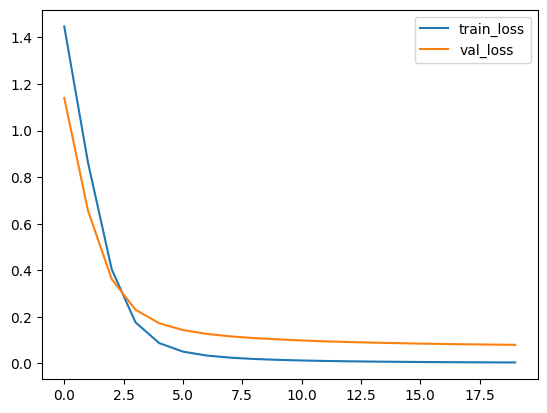

In [25]:
# plotting loss per iteration
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend();

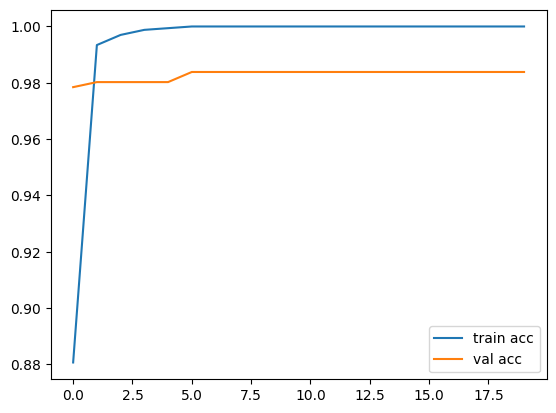

In [26]:
# plotting accuracy per iteration
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend();

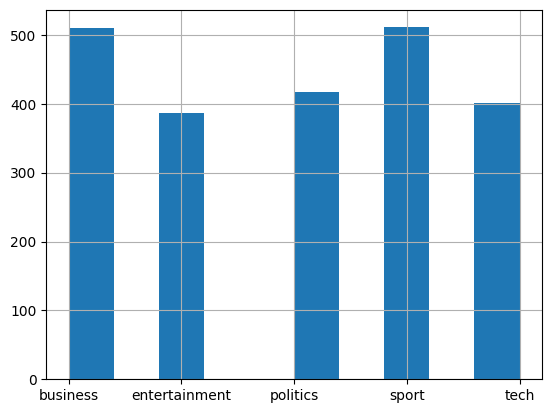

In [27]:
df['labels'].hist();